In [70]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
%matplotlib inline

path = r"C:\Users\suhas\Documents\cf\ch6\Data\flavors_of_cacao_cleaned.csv"
df = pd.read_csv(path)
df.head(10)

,Manufacturer,BarName,REF,ReviewDate,CocoaPercent,Location,Rating,BeanType,BroadOrigin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Unknown,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Unknown,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Unknown,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,Unknown,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Unknown,Peru
5,A. Morin,Carenero,1315,2014,70.0,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70.0,France,3.50,Unknown,Cuba
7,A. Morin,Sur del Lago,1315,2014,70.0,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70.0,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70.0,France,4.00,Unknown,Peru


Variables of note include CocoaPercent, Rating, BroadOrigin, BeanType, Location, and Manufacturer

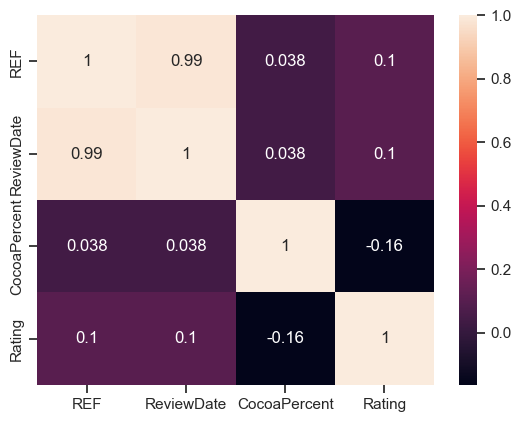

In [71]:
# Heatmap of numeric data
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.savefig(r"C:\Users\suhas\Documents\cf\ch6\Visualizations\heatmap.png")
plt.show()

Most numeric correlations are extremely small. Cocoa Percent has an inverse relationship with Rating

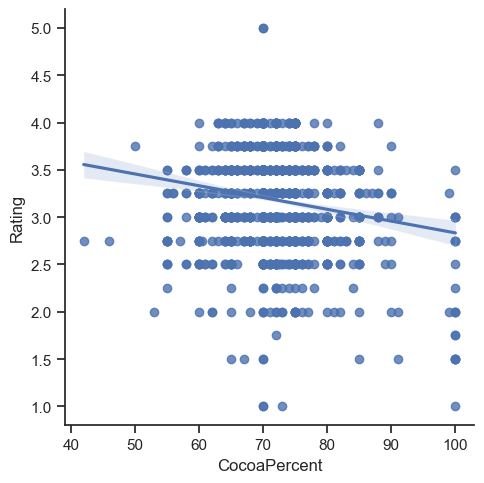

In [72]:
# Correlation plot between CocoaPercent and Rating
sns.lmplot(x = 'CocoaPercent', y = 'Rating', data = df)
plt.savefig(r"C:\Users\suhas\Documents\cf\ch6\Visualizations\cocoapercent_rating_scatter.png")
plt.show()

As expected the data has a minimal correlation by lookign at it spread, but said correlation is slightly negative

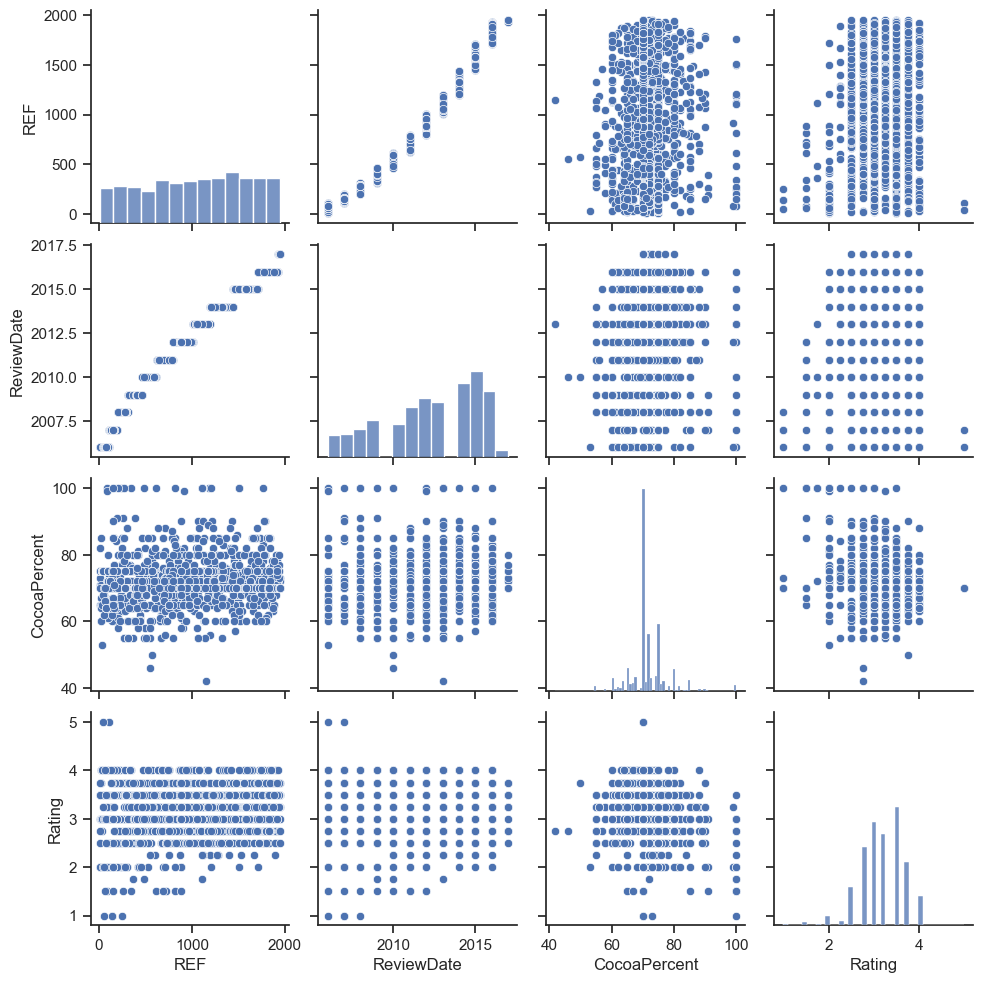

In [73]:
# Pairplots of numeric variables
sns.pairplot(df)
plt.savefig(r"C:\Users\suhas\Documents\cf\ch6\Visualizations\pairplot.png")
plt.show()

REF and ReviewDate have a strong relationship that is slightly curved. A logistic regression could model their relationship well.
REF data is somewhat uniformly distributed.
ReviewDate has a skew left distribution.


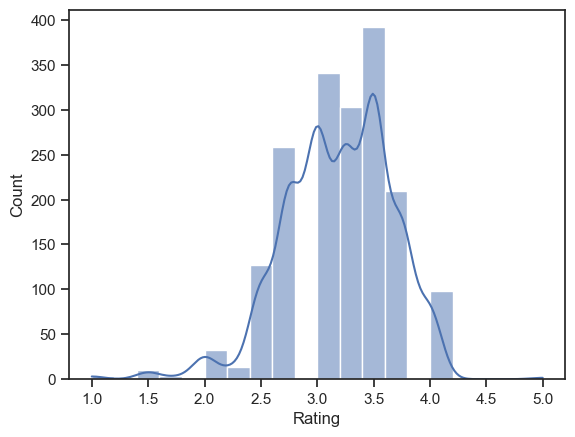

In [74]:
# Histogram of rating
sns.histplot(df['Rating'], bins = 20, kde = True)
plt.savefig(r"C:\Users\suhas\Documents\cf\ch6\Visualizations\histplot.png")
plt.show()


In [75]:
# Split ratings into 3 categories by dividing them into equal rating categories
df.loc[df['Rating'] < 1.67, 'RatingCategory'] = 'Low Rating'

df.loc[(df['Rating'] >= 1.67) & (df['Rating'] < 3.34), 'RatingCategory'] = 'Medium Rating'

df.loc[df['Rating'] >= 3.34, 'RatingCategory'] = 'High Rating'

df['RatingCategory'].value_counts(dropna = False)

df.columns

Index(['Manufacturer', 'BarName', 'REF', 'ReviewDate', 'CocoaPercent',
       'Location', 'Rating', 'BeanType', 'BroadOrigin', 'RatingCategory'],
      dtype='object')

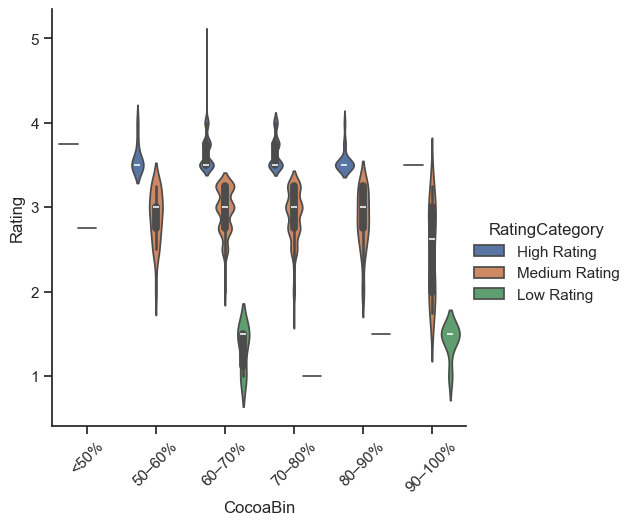

In [76]:
# Create bins for chocolate percentage
bins = [0, 50, 60, 70, 80, 90, 100]
labels = ['<50%', '50–60%', '60–70%', '70–80%', '80–90%', '90–100%']
df['CocoaBin'] = pd.cut(df['CocoaPercent'], bins=bins, labels=labels)

# Plot with Binned Columns as a Violin
sns.set(style="ticks")
g = sns.catplot(x="CocoaBin", y="Rating", hue="RatingCategory", data=df, kind='violin')
plt.xticks(rotation=45)
plt.savefig(r"C:\Users\suhas\Documents\cf\ch6\Visualizations\catplot.png")
plt.show()


How does CocoaPercent relate to Rating?
There is an inverse correlation between CocoaPercent and Rating
My hypothesis is that a bar's CocoaPercent and its BroadOrigin have the largest impact on its eventual rating.